In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import json
import h5py
import pprint
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

from utils.io import load_json, read_spreadsheet

### Tempo-TL

In [3]:
URL = "https://docs.google.com/spreadsheets/d/1sQAeF71xhpzD__trt45wpqh-6Pq5oDjfLPrmiXESKos/edit#gid=1806154206"

df = read_spreadsheet(sheet_id="1sQAeF71xhpzD__trt45wpqh-6Pq5oDjfLPrmiXESKos", gid="1806154206")

In [4]:
df

,Method,DiDeMo - R@1,DiDeMo - mIoU,Before - R@1,Before - mIoU,After - R@1,After - mIoU,Then - R@1,Then - mIoU,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Frequency Prior,10.71,20.67,17.85,24.22,22.42,25.76,0.00,24.73,12.74,52.58,23.84
1,MCN,24.85,37.92,32.28,38.67,26.08,35.44,25.07,53.94,27.07,73.36,41.49
2,TALL,20.95,32.09,27.13,32.41,26.30,34.27,4.84,36.75,19.80,64.66,33.88
3,MLLC- Global,26.32,40.37,31.92,38.26,25.37,35.59,27.53,57.08,27.78,74.14,42.82
4,MLLC B/A,26.04,39.60,34.04,40.46,28.50,38.18,25.60,54.37,28.54,74.92,43.15
5,MLLC (WS),26.57,40.99,30.56,37.64,24.76,35.10,26.95,56.49,26.95,74.18,42.55
6,MLLC (WS + conTEF),25.87,40.37,32.01,39.51,24.31,33.94,24.98,55.22,26.79,74.04,42.27
7,MLLC (SS),26.09,40.12,28.45,34.38,23.79,33.92,24.27,55.00,25.65,73.60,40.86
8,MLLC (SS + conTEF),27.46,41.20,35.31,41.81,29.38,38.90,26.83,54.97,29.74,76.76,44.22


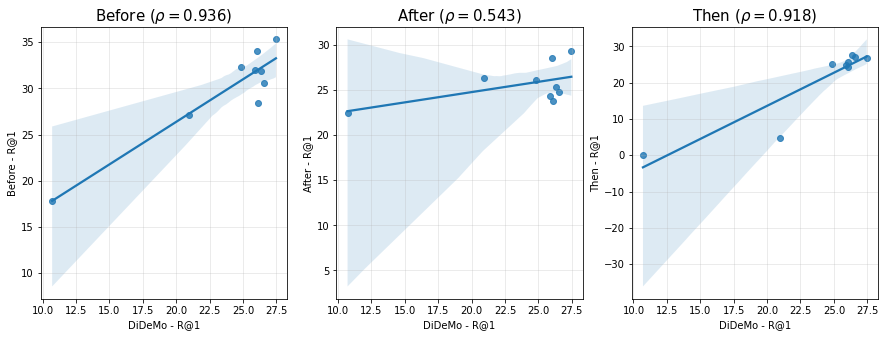

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

words = ["Before", "After", "Then"]
metric = "R@1"
# metric = "mIoU"

for i, w in enumerate(words):
    ax = axes[i]
    # ax.scatter(df["DiDeMo - R@1"], df["Before - R@1"])
    sns.regplot(x=df[f"DiDeMo - {metric}"], y=df[f"{w} - {metric}"], ax=ax)
    corr = np.corrcoef(df[f"DiDeMo - {metric}"], df[f"{w} - {metric}"])[0][1]
    corr_str = f" ($\\rho = {corr:.3f}$)"
    ax.set_title(w + str(corr_str), fontsize=15)
    ax.grid(alpha=0.3)

plt.show()

### Tempo-HL

In [12]:
URL = "https://docs.google.com/spreadsheets/d/1sQAeF71xhpzD__trt45wpqh-6Pq5oDjfLPrmiXESKos/edit#gid=1426006034"

df = read_spreadsheet(sheet_id="1sQAeF71xhpzD__trt45wpqh-6Pq5oDjfLPrmiXESKos", gid="1426006034")

In [13]:
df

,Method,DiDeMo - R@1,DiDeMo - mIoU,Before - R@1,Before - mIoU,After - R@1,After - mIoU,Then - R@1,Then - mIoU,While - R@1,While - mIoU,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Frequency Prior,19.43,25.44,29.31,51.92,0.00,0.00,0.00,7.84,4.74,12.27,10.69,37.56,19.50
1,MCN,26.07,39.92,26.79,51.40,14.93,34.28,18.55,47.92,10.70,35.47,19.40,70.88,41.80
2,TALL + TEF,21.79,33.55,25.91,49.26,14.43,32.62,2.52,31.13,8.10,28.14,14.55,60.69,34.94
3,MLLC - Global,27.01,41.72,27.42,52.22,14.10,34.33,18.40,49.17,10.86,35.36,19.56,71.23,42.56
4,MLLC - B/A,26.47,40.39,31.95,55.89,14.93,34.78,17.36,47.52,11.32,35.52,20.40,70.97,42.82
5,MLLC (Ours),27.38,42.45,32.33,56.91,14.43,37.33,19.58,50.39,10.39,35.95,20.82,71.68,44.57
6,MLLC (Ours) (Supervised),27.39,42.25,52.58,80.37,36.48,75.79,36.05,70.51,10.39,35.87,32.58,79.86,60.96


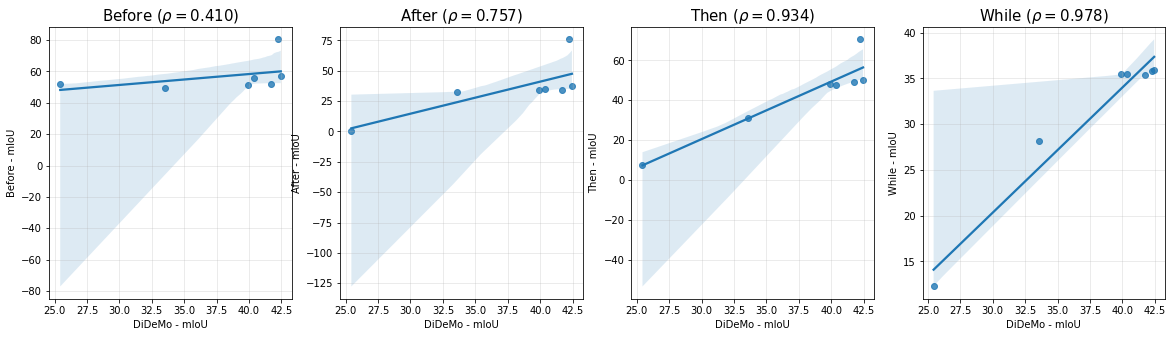

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

words = ["Before", "After", "Then", "While"]
# metric = "R@1"
metric = "mIoU"

for i, w in enumerate(words):
    ax = axes[i]
    # ax.scatter(df["DiDeMo - R@1"], df["Before - R@1"])
    sns.regplot(x=df[f"DiDeMo - {metric}"], y=df[f"{w} - {metric}"], ax=ax)
    corr = np.corrcoef(df[f"DiDeMo - {metric}"], df[f"{w} - {metric}"])[0][1]
    corr_str = f" ($\\rho = {corr:.3f}$)"
    ax.set_title(w + str(corr_str), fontsize=15)
    ax.grid(alpha=0.3)

plt.show()